In [1]:
#i used google colab to run this
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.datasets import mnist #used for downloading mnist data 
from keras.utils import np_utils #used later to encode the dataset labels

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data() #loading dataset


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('X_train: ' + str(train_X.shape)) #printing the shapes of our data
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


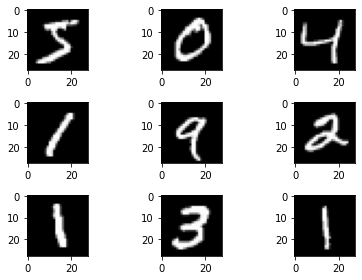

In [5]:
fig = plt.figure() #plotting the first 9 train examples
for i in range(9):  
 plt.subplot(3, 3, i+1)
 plt.tight_layout()
 plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))


In [6]:
train_X = train_X.reshape(-1, 28, 28, 1) #all the images are in grayscale and equal in size(28x28)...
test_X = test_X.reshape(-1, 28, 28, 1) #so we can reshape the training data to have a single color channel

In [7]:
number_of_classes = 10 #from 0 to 9, we have 10 classes
Y_train = np_utils.to_categorical(train_y, number_of_classes) #encoding labels (one-hot)
Y_test = np_utils.to_categorical(test_y, number_of_classes)

In [8]:
cnn = tf.keras.models.Sequential() #creating our model

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28,28,1)))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layer, consists of 10 units with softmax activation for one-hot encoding

In [16]:
cnn.compile(optimizer='adam', loss = 'CategoricalCrossentropy', metrics=['accuracy']) #due to having more than 2 classes we use CategoricalCrossentropy

In [17]:
cnn.summary() #showing a summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [18]:
cnn.fit(train_X, Y_train, batch_size= 128, epochs=10, validation_data=(test_X, Y_test)) #training our model

Epoch 1/10
469/469 [==============================] - 17s 35ms/step - loss: 1.0808 - accuracy: 0.8752 - val_loss: 0.1647 - val_accuracy: 0.9551
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1268 - accuracy: 0.9643 - val_loss: 0.1078 - val_accuracy: 0.9697
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0749 - accuracy: 0.9775 - val_loss: 0.0905 - val_accuracy: 0.9741
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0787 - val_accuracy: 0.9776
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0752 - val_accuracy: 0.9804
Epoch 6/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0757 - val_accuracy: 0.9809
Epoch 7/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.0700 - val_accuracy:

In [19]:
from keras.utils import load_img, img_to_array #used for testing our model with our own images

In [20]:
test_img = load_img('test.png',grayscale=True, target_size=(28, 28)) #loading image made with paint named test.png 
#(must be dragged in this notebook directory using the panel at left)
#image must be 28x28 with black background, drawing must be made with white colored brush

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [21]:
test_img = img_to_array(test_img) #converting image to array

In [22]:
test_image = np.expand_dims(test_img, axis=0) #need to make it a 4 dimensional array so it can be applied to model(model trained 4 dimensionally)

In [23]:
test_image.shape

(1, 28, 28, 1)

In [24]:
cnn.predict(test_image) #predicting output

1/1 [==============================] - 0s 74ms/step


array([[9.2530665e-18, 1.1355723e-14, 1.0000000e+00, 7.6387761e-15,
        9.1182195e-21, 2.7829520e-18, 2.1423658e-20, 1.6221369e-10,
        3.9559670e-15, 1.0512949e-14]], dtype=float32)

In [25]:
array = cnn.predict(test_image) #output of our model predicting the label of test image

1/1 [==============================] - 0s 16ms/step


In [26]:
predicteddigit = np.argmax(array) #finding the class with highest output value
predicteddigit

2

# end.